In [1]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()


True

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(
    model="gemini-3-flash-preview",
    temperature=1.0,  # Gemini 3.0+ defaults to 1.0
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)
email = """"
Dear winner,
you have been selected as the lucky winner of our international lottery. to claim your prize,
Don't miss this opportunity!
"""


messages = [
        (
            "system",
            "You are a spam classifier. "
            "Return ONLY 'true' or 'false'. "
            "true = spam, false = not spam."
        ),
        ("human", email),
    ]

ai_msg = model.invoke(messages)
result = ai_msg.content[0]["text"]
    

In [3]:
result

'true'

In [4]:
class State(TypedDict):
    email: str
    is_spam: bool
    translated_email: str

In [5]:
def classify_email_mode_1(state: State):
    email = state["email"]   # لا تمسحه

    messages = [
        (
            "system",
            "You are a spam classifier. "
            "Return ONLY 'true' or 'false'. "
            "true = spam, false = not spam."
        ),
        ("human", email),
    ]

    ai_msg = model.invoke(messages)

    # الحل الصحيح
    result = ai_msg.text.strip().lower()

    return {
        "is_spam": result == "true"
    }

In [ ]:
def classify_email_mode_1(state: State):
    email = state["email"]

    email = """

hi iam mohamed i am from egypt
"""

    messages = [
        (
            "system",
            "You are a spam classifier. "
            "Return ONLY 'true' or 'false'. "
            "true = spam, false = not spam."
        ),
        ("human", email),
    ]

    ai_msg = model.invoke(messages)

    
    result = ai_msg.content.strip().lower()

    is_spam = True if result == "true" else False

    return {
        "is_spam": is_spam
    }

In [6]:
def routeril_node_2(state: State):
    
    if state["is_spam"] == True:
        return END
    
    else:
        return "summrizer"


In [8]:
def translate_node_3(state: State):
    email = state["email"]

    messages = [
        (
            "system",
            "You are a translator "
            "translate this email to arbic. "
            
        ),
        ("human", email),
    ]

    ai_msg = model.invoke(messages)
    translated_email = ai_msg.content[0]["text"]

   

    return {
        "translated_email": translated_email
    }

In [9]:
graph = StateGraph(State)

graph.add_node("classifier",classify_email_mode_1)
graph.add_edge(START, "classifier")

graph.add_conditional_edges(
    "classifier",
    routeril_node_2,
    [END, "summrizer"]
)

graph.add_node("summrizer",translate_node_3 )
graph.add_edge("summrizer", END)


agent = graph.compile()

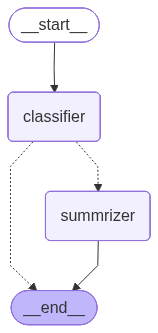

In [10]:
from IPython.display import Image, display
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

In [11]:
result = agent.invoke({
    "email": "hi iam mohamed i am from egypt"
})

In [12]:
type(result)

dict

In [13]:
result

{'email': 'hi iam mohamed i am from egypt',
 'is_spam': False,
 'translated_email': 'أهلاً، أنا محمد من مصر.'}